In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/NIAS/Dados'
df_covid = pd.read_csv(f'{path}/covid_19_clean_complete.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
regions = ['Americas', 'Eastern Mediterranean', 'Africa']
df_filtrado = df_covid[df_covid['WHO Region'].isin(regions)]

df_med_america_europe = df_filtrado.groupby(['Date', 'WHO Region'])['Deaths'].sum().reset_index()
df_med_america_europe



,Date,WHO Region,Deaths
0,2020-01-22,Africa,0
1,2020-01-22,Americas,0
2,2020-01-22,Eastern Mediterranean,0
3,2020-01-23,Africa,0
4,2020-01-23,Americas,0
...,...,...,...
559,2020-07-26,Americas,339177
560,2020-07-26,Eastern Mediterranean,37894
561,2020-07-27,Africa,12223
562,2020-07-27,Americas,342732


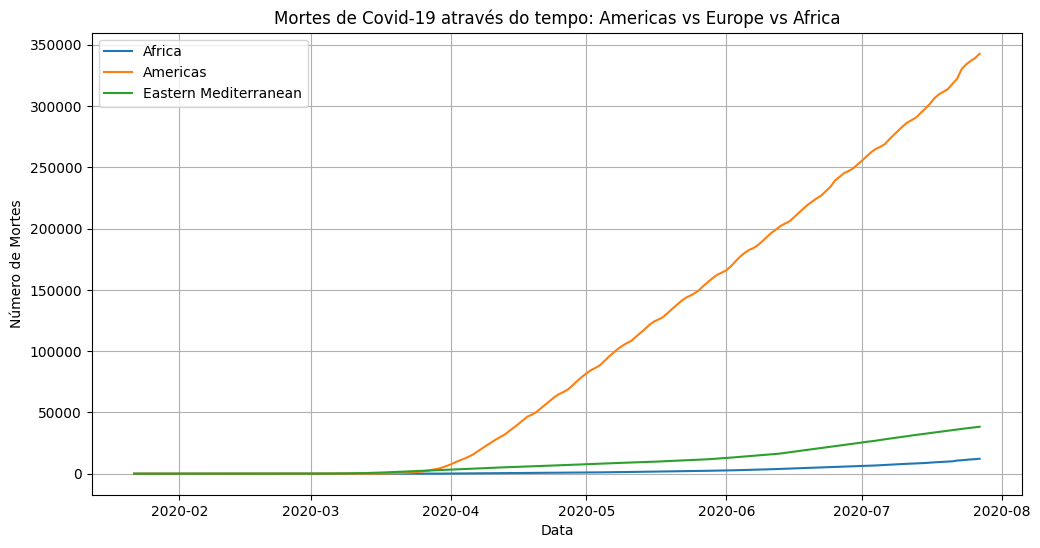

In [ ]:
df_pivot = df_med_america_europe.pivot(index='Date', columns='WHO Region', values='Deaths')

plt.figure(figsize=(12, 6))
for region in df_pivot.columns:
    plt.plot(df_pivot .index, df_pivot[region], label=region)

plt.title('Mortes de Covid-19 através do tempo: Americas vs Europe vs Africa')
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.legend()
plt.grid(True)
plt.show()

**1-** A região das *Américas* registrou o maior número de mortes acumuladas.
**2-** A curva de números de mortos das *Américas* tem um salto no final de março e início de Abril, enquanto que a *Eastern Meditarrenean* cresce de forma gradativa e tem um salto significativo em Maio; a curva da *África* segue o mesmo comportamento, com o seu salto em Julho.

In [ ]:
df_agrupado = df_covid.groupby('WHO Region')['Deaths'].sum().reset_index()
df_agrupado.sort_values('Deaths', ascending=False)

,WHO Region,Deaths
1,Americas,19359292
3,Europe,19271040
2,Eastern Mediterranean,1924029
4,South-East Asia,1458134
5,Western Pacific,932430
0,Africa,439978


/tmp/ipython-input-1094058164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x='WHO Region', y='Deaths', palette='muted')


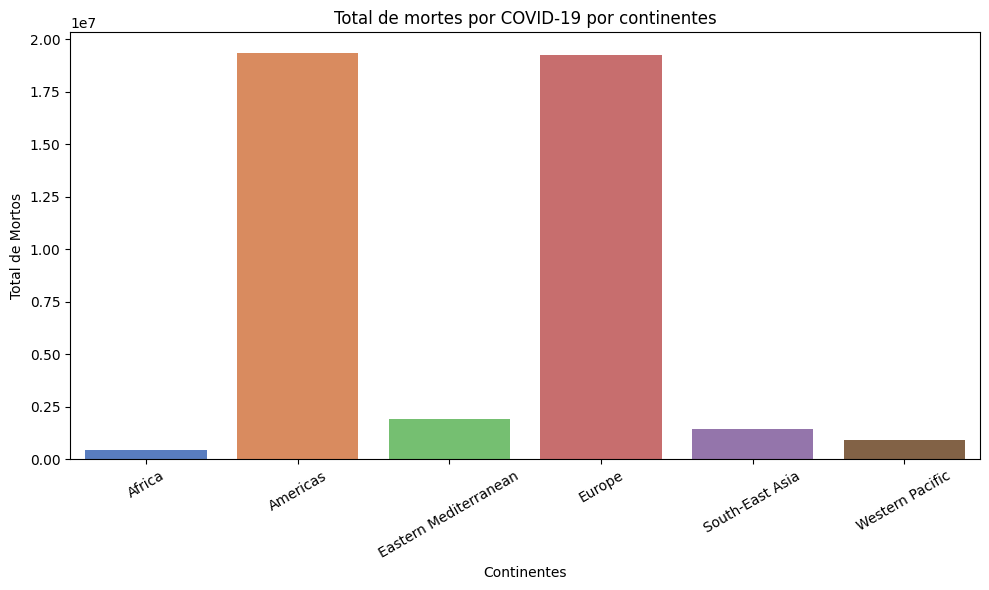

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_agrupado, x='WHO Region', y='Deaths', palette='muted')
plt.title('Total de mortes por COVID-19 por continentes')
plt.xlabel("Continentes")
plt.ylabel("Total de Mortos")
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

A minha hipótese foi _somar o número de mortes_ agrupando cada um dos *continentes*. Os continentes com os maiores números de mortes foram _Americas_ e _Europe_, primeiro e segundo respectivamente. E o continente com o menor número de mortes foi a _África_.

In [ ]:
df_world = pd.read_csv(f'{path}/world_data.csv')
df_world_grouped = df_world.groupby('Continent')['Deaths/1M pop'].mean().reset_index()
df_world_ = df_world.groupby('Continent')['Population'].sum().reset_index()
df_world_grouped = pd.merge(df_world_grouped, df_world_, on='Continent')
df_world_grouped.sort_values('Deaths/1M pop', ascending=False)

,Continent,Deaths/1M pop,Population
5,South America,1902.692308,434639407
3,Europe,1493.106383,748123654
4,North America,602.485714,594002739
1,Asia,356.721277,3206566144
2,Australia/Oceania,224.142857,41469151
0,Africa,202.426316,1375541486


In [ ]:
continents = ['South America', 'Europe', 'North America']
df_world_filtrado = df_world_grouped[df_world_grouped['Continent'].isin(continents)]
df_world_filtrado

,Continent,Deaths/1M pop,Population
3,Europe,1493.106383,748123654
4,North America,602.485714,594002739
5,South America,1902.692308,434639407


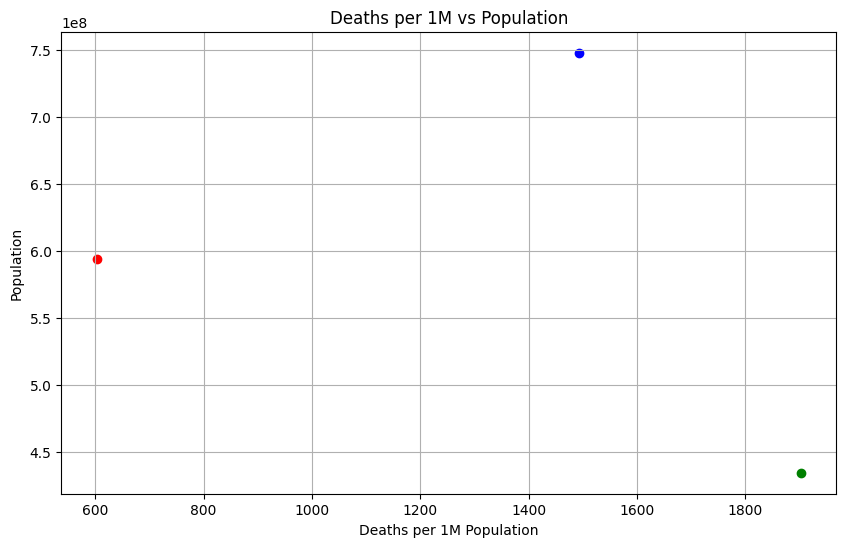

In [ ]:
cores = {'Europe' : 'blue', 'North America' : 'red', 'South America' : 'green'}


plt.figure(figsize=(10, 6))

for continent in df_world_filtrado['Continent']:
  subset = df_world_filtrado[df_world_filtrado['Continent'] == continent]
  plt.scatter(
      subset['Deaths/1M pop'],
      subset['Population'],
      label=continent,
      color=cores.get(continent, 'gray'),
      )

plt.title('Deaths per 1M vs Population')
plt.xlabel('Deaths per 1M Population')
plt.ylabel('Population')
plt.grid(True)
plt.show()

In [ ]:
matriz_correlacao = df_world.corr(numeric_only=True)

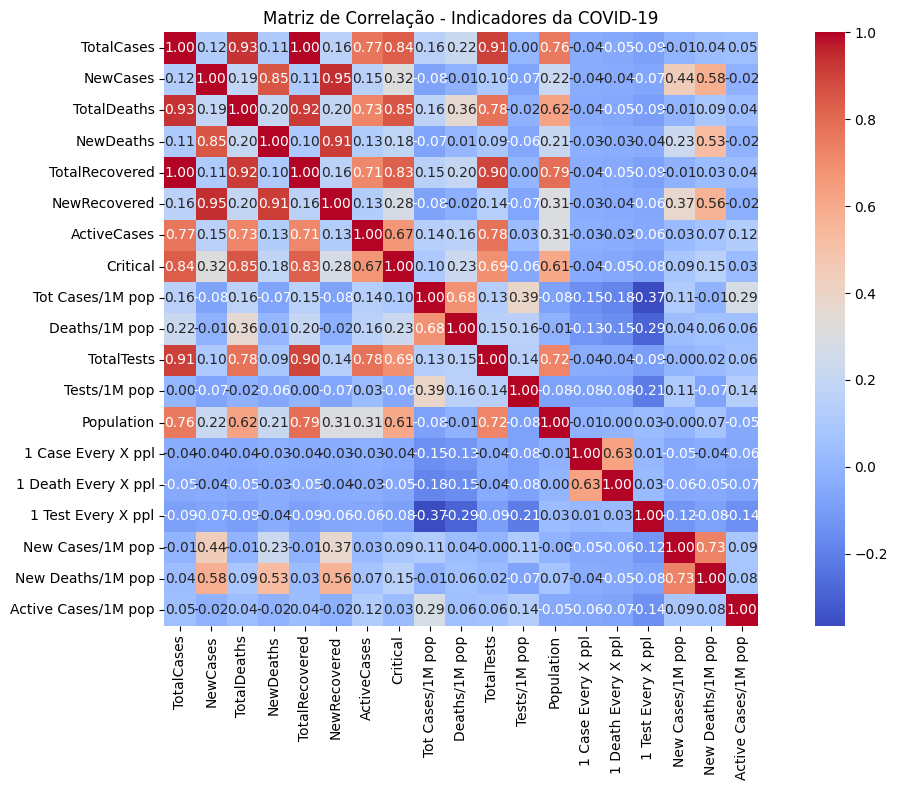

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Matriz de Correlação - Indicadores da COVID-19")
plt.tight_layout()
plt.show()


In [ ]:
pop_corr = matriz_correlacao.loc['Population', 'Tests/1M pop']
print(f'A correlação entre População e Testes/1M pop foi de {pop_corr:.3f}')

A correlação entre População e Testes/1M pop foi de -0.081


A correlação foi de **-0,081**, e isso indica que a correlação entre as variáveis Population e Tests/1M pop é uma _correlação negativa fraca_.